#Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Importing the Dataset

In [ ]:
data = pd.read_csv("dataset.csv")
data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,potato


#Data Pre-Processing

In [ ]:
data.isna().sum()

N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

In [ ]:
enc = LabelEncoder()
data.label = enc.fit_transform(data.label)

In [ ]:
data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,3
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,3
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,3
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,3
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,3
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,4
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,4
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,4
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,4


In [ ]:
data.shape

(620, 12)

#SMOTE To Reduce Class Imbalance


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(data.drop(["label"],axis=1), data.label)

#Splitting the Dataset

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    shuffle=True)

#Model Building

In [ ]:
rf = RandomForestClassifier(n_estimators=15,random_state=0)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=15, random_state=0)

In [ ]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(rf.predict(train_x),train_y)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(rf.predict(test_x),test_y)*100))
print("Precision      : {:.2f} %".format(precision_score(rf.predict(test_x),test_y,average="micro")*100))
print("Recall         : {:.2f} %".format(recall_score(rf.predict(test_x),test_y,average="micro")*100))

Train Accuracy : 99.80 %
Test Accuracy  : 96.80 %
Precision      : 96.80 %
Recall         : 96.80 %


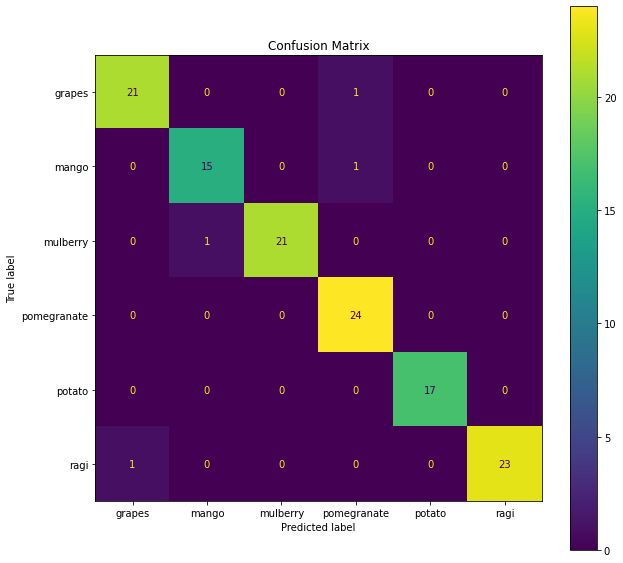

In [ ]:
cm = confusion_matrix(rf.predict(test_x),test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[enc.classes_[i] for i in rf.classes_])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle
pickle.dump(rf,open('CropRecommender.pkl','wb'))

In [ ]:
rf.predict(test_x)

array([0, 2, 5, 0, 2, 0, 4, 4, 5, 4, 5, 1, 0, 5, 0, 2, 5, 2, 0, 3, 0, 4,
       0, 2, 3, 0, 5, 1, 2, 5, 5, 3, 3, 4, 1, 5, 2, 1, 5, 3, 1, 4, 5, 3,
       3, 5, 4, 5, 4, 2, 5, 4, 1, 4, 2, 3, 2, 1, 0, 4, 0, 0, 3, 5, 3, 5,
       2, 1, 3, 2, 3, 5, 0, 3, 0, 1, 5, 2, 1, 2, 0, 0, 4, 0, 0, 3, 0, 1,
       5, 3, 2, 1, 3, 2, 5, 5, 5, 3, 4, 2, 2, 4, 3, 2, 1, 4, 3, 2, 3, 0,
       2, 1, 3, 0, 3, 1, 4, 3, 5, 4, 0, 2, 1, 5, 3])

In [ ]:
test_x

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
210,157,35,62,5.9,0.20,0.1050,12.01,149.89,98.51,38.97,28.68
319,121,26,54,6.6,0.77,0.2540,20.40,214.29,1076.67,24.33,13.47
511,148,97,365,5.8,1.70,0.0145,16.65,138.79,57.07,19.13,1.64
299,147,60,64,6.2,0.12,0.0430,15.39,70.29,140.79,34.46,36.79
365,120,16,61,6.4,0.55,0.2270,18.59,114.46,1492.46,22.12,10.17
...,...,...,...,...,...,...,...,...,...,...,...
229,145,43,89,5.9,0.20,0.1260,5.56,84.79,93.06,32.96,47.63
313,129,29,55,6.0,0.53,0.2950,22.48,164.02,305.54,26.34,16.09
165,81,77,151,5.6,1.43,0.3200,11.18,70.99,82.76,30.27,52.31
467,142,83,352,7.7,0.68,0.0179,13.18,149.81,66.01,26.53,7.10


In [ ]:
type(test_x)

pandas.core.frame.DataFrame

In [ ]:
Xnew = [[157,	35,	62,	5.9,	0.20,	0.1050,	12.01,	149.89,	98.51, 38.97, 28.68]]
rf.predict(Xnew)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
# 3 - pomegranate
# 0 - grapes
# 1 - Mango
# 2 - Mulberry
# 5 - ragi
# 4 - potato